In [ ]:
GRAY SCOTT

import numpy as np

import matplotlib.pyplot as plt                # type: ignore
from matplotlib.animation import FuncAnimation # type: ignore

from IPython.display import HTML               # type: ignore
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**32


def laplace_five(grid: np.ndarray) -> np.ndarray:
 res = (grid[1:-1,2:] + grid[1:-1,:-2] 
            + grid[2:,1:-1] + grid[:-2,1:-1] 
            - 4*grid[1:-1,1:-1])
 return res

def laplace_nine(grid: np.ndarray) -> np.ndarray:
   res = (grid[:-2,:-2] + grid[:-2,1:-1] + grid[:-2,2:]
            + grid[1:-1,:-2] + grid[1:-1,2:]
            + grid[2:,:-2] + grid[2:,1:-1] + grid[2:,2:]
            - 8*grid[1:-1,1:-1])
   
   return grid[1:-1, 1:-1].copy()


def gray_scott(u: np.ndarray, v: np.ndarray,
               d_u: float, d_v: float,
               f: float, k: float): #-> tuple[np.ndarray, np.ndarray]:
    """Compute a new pair of matrices with updated values after a time unit.
    d_u, d_v are diffusion rates of chemicals U and V.
    f is the rate of conversion of U and V in V (U + V -> 3V)
    k is the rate of conversion of V in P (V -> P, P not represented)
    """
    inner_u, inner_v = u[1:-1,1:-1].copy(), v[1:-1,1:-1].copy()
    uvv = inner_u*inner_v**2
    inner_u += d_u*laplace_five(u) - uvv + f*(1 - inner_u)
    inner_v += d_v*laplace_five(v) + uvv - (f+k)*inner_v
    return np.pad(inner_u, 1), np.pad(inner_v, 1)

def init_square(n: int,
                r: int = 20, u_0: float = 0.5, v_0: float = 0.25,
                d: float = .05): #-> tuple[np.ndarray, np.ndarray]:
    """Create a pair of matrices (n+2, n+2).
    The matrices have a zero border.
    The inner part of the first one is 1 +/- a uniform random choice between [-d, d].
    The inner part of the second one is 0 +/- a uniform random choice between [-d, d].
    A central square seed is set to fixed values (u_0, v_0) with edge r. 
    """
    u, v = np.ones((n, n)), np.zeros((n, n))
    mid = n // 2
    half = r // 2
    u += np.random.uniform(-d, d, (n, n))
    v += np.random.uniform(-d, d, (n, n))
    u[mid-half:mid+half, mid-half:mid+half] = u_0
    v[mid-half:mid+half, mid-half:mid+half] = v_0
    return np.pad(u, 1), np.pad(v, 1)

def init_circle(n: int,
                r: int = 20, u_0: float = 0.5, v_0: float = 0.25,
                d: float = .05): #-> tuple[np.ndarray, np.ndarray]:
    """Create a pair of matrices (n+2, n+2).
    The matrices have a zero border.
    The inner part of the first one is 1 +/- a uniform random choice between [-d, d].
    The inner part of the second one is 0 +/- a uniform random choice between [-d, d].
    A central circle seed is set to fixed values (u_0, v_0) with edge r. 
    """
    u, v = np.ones((n, n)), np.zeros((n, n))
    u += np.random.uniform(-d, d, (n, n))
    v += np.random.uniform(-d, d, (n, n))
    y, x = np.ogrid[0:n,0:n]
    mid = n // 2
    mask = (x - mid)**2 + (y - mid)**2 < r
    u[mask] = u_0
    v[mask] = v_0
    return np.pad(u, 1), np.pad(v, 1)

class GrayScott:
    def __init__(self, size: int, Du: float = .16, Dv: float = .08, f: float = .035, k: float = .065):
        self.U, self.V = init_square(size)
        self.Du, self.Dv, self.f, self.k = Du, Dv, f, k
 
        self.fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
        ax[0].set_title('U')
        ax[1].set_title('V')
        self.im_U = ax[0].imshow(self.U)
        self.im_V = ax[1].imshow(self.V)

    def update(self, frame: int):
        
        for _ in range(100):
            self.U, self.V = gray_scott(self.U, self.V, 
                                        self.Du, self.Dv, self.f, self.k)
            
        self.im_V.set_data(self.V)
        self.im_U.set_data(self.U)


    def animate(self, frames: int):
        self.animation = FuncAnimation(self.fig, self.update, frames=frames)


gs = GrayScott(256, 0.16, 0.08, 0.035, 0.060)

gs.animate(100)

HTML(gs.animation.to_jshtml())




Edge detection


In [ ]:

import numpy as np
import matplotlib.pyplot as plt  # type: ignore

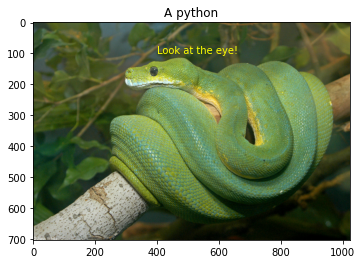

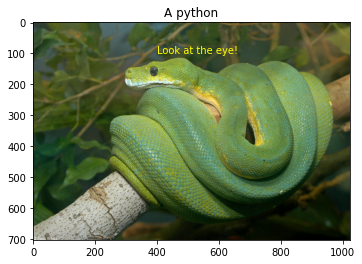

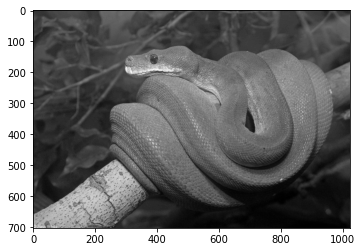

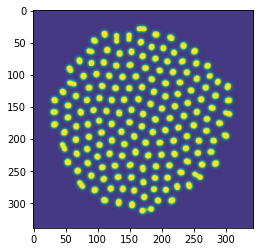

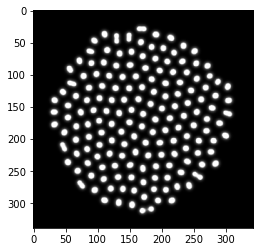

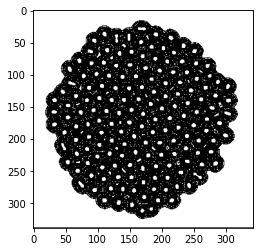

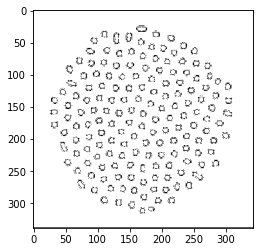

In [ ]:


filepath='/content/python.jpg'

pi = plt.imread(filepath)

type(pi)

pi.shape

pi[0,0]

fig, ax = plt.subplots()
ax.set_title('A python')
ax.text(400, 100, 'Look at the eye!', color='yellow')
_ = ax.imshow(pi)

pi_f = pi/256 # the color is now encoded as a float between 0 and 1.

pi_f[0,0], pi[0,0] # different encodings, same color

fig, ax = plt.subplots()
ax.set_title('A python')
ax.text(400, 100, 'Look at the eye!', color='yellow')
_ = ax.imshow(pi_f)

# For many application is easier if we have just **one** number for each pixel (instead of three). We can use the mean of the three RGB values to a get something we can take as the *value of the signal*.

pi_bw = pi_f.mean(axis=2)

pi_bw.shape

# Since we now have a "signal" non a "color" with a **colormap** to map the signal to a color. There are [many](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

fig, ax = plt.subplots()
_ = ax.imshow(pi_bw, cmap=plt.cm.gray) 

# ## Edge dection

b = plt.imread('batteri.png')

fig, ax = plt.subplots()
_ = ax.imshow(b)

b = b[:,:,:3] # It was ended as RGBA, but with don't care about the A (alpha transparency)

b_bw = b.mean(axis=2)

fig, ax = plt.subplots()
_ = ax.imshow(b_bw, cmap=plt.cm.binary_r)


# Edges are the points in which the *second derivative of the signal* is zero. We can compute the second derivative with our Laplacian. See a longer explanation [here](https://www.youtube.com/watch?v=uNP6ZwQ3r6A).

def laplace_five(grid: np.ndarray) -> np.ndarray:
    """Compute the Laplace operator (5-point stencil).
    The grid has a zero border.
    >>> g = np.array([[0, 0, 0, 0],
    ...               [0, 1, 0, 0],
    ...               [0, 0, 1, 0],
    ...               [0, 0, 0, 0]])
    >>> laplace_five(g)
    array([[-4,  2],
           [ 2, -4]])
    """
    res = (grid[1:-1,2:] + grid[1:-1,:-2] 
            + grid[2:,1:-1] + grid[:-2,1:-1] 
            - 4*grid[1:-1,1:-1])
    return res


edge = np.zeros_like(b_bw)
edge[laplace_five(np.pad(b_bw, 1)) == 0] = 1

fig, ax = plt.subplots()
_ = ax.imshow(edge, cmap=plt.cm.binary_r)

# To get a better result we can take as zero all the values in which the absolute value is less than a threshold (0.1).

edge = np.zeros_like(b_bw)
edge[abs(laplace_five(np.pad(b_bw, 1))) < 0.1] = 1

fig, ax = plt.subplots()
_ = ax.imshow(edge, cmap=plt.cm.binary_r)

In [ ]:
import os

In [ ]:
file_path = os.path.abspath('python.jpg')
print(file_path)

/content/python.jpg
